# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
file_path = current_dir / 'data/daily-total-female-births-CA.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df['date'].dtype

dtype('O')

For future data analysis, we want the 'date' column as date and not string.

In [9]:
df = pd.read_csv(file_path, parse_dates=[0])

In [10]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [12]:
df['date'].dtype

dtype('<M8[ns]')

**Note**

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

# Load Data as Series

In [13]:
# squeeze=True, changes the dataframe to a series
s = pd.read_csv(file_path, parse_dates=[0], index_col=0, squeeze=True)

In [14]:
s.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

## Size

In [15]:
s.shape

(365,)

In [16]:
df.shape

(365, 2)

## Quering by Time

This the advantage of using date and not string.

In [17]:
s['1959-09']

date
1959-09-01    38
1959-09-02    68
1959-09-03    40
1959-09-04    42
1959-09-05    51
1959-09-06    44
1959-09-07    45
1959-09-08    36
1959-09-09    57
1959-09-10    44
1959-09-11    42
1959-09-12    53
1959-09-13    42
1959-09-14    34
1959-09-15    40
1959-09-16    56
1959-09-17    44
1959-09-18    53
1959-09-19    55
1959-09-20    39
1959-09-21    59
1959-09-22    55
1959-09-23    73
1959-09-24    55
1959-09-25    44
1959-09-26    43
1959-09-27    40
1959-09-28    47
1959-09-29    51
1959-09-30    56
Name: births, dtype: int64

In [18]:
df[(df['date'] > '1959-01-01') & (df['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In case of **series**, you can just write the **month value** but for **dataframe** you have to mention the **range** of dates between which you want the data.

## Descriptive Statistics

In [19]:
s.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [20]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Resampling

Do we need to resample the data?

# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature

## Date Time Features

In [21]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [22]:
feature = df.copy()

In [23]:
feature['year'] = df['date'].dt.year

In [24]:
feature['month'] = df['date'].dt.month

In [25]:
feature['day'] = df['date'].dt.day

In [26]:
feature.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

## Lag Features

In [27]:
feature['lag1'] = df['births'].shift(1)

In [28]:
feature['lag2'] = df['births'].shift(365)

In [29]:
feature.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

## Window Features

In [30]:
feature['Roll_mean'] = df['births'].rolling(window=2).mean()

In [31]:
feature.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [32]:
feature['Roll_max'] = df['births'].rolling(window=3).max()

In [33]:
feature.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

## Expanding Features

In [34]:
feature['Expand_max'] = df['births'].expanding().max()

In [35]:
feature.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series Visualization

In [36]:
vz = df.copy()

In [37]:
vz.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


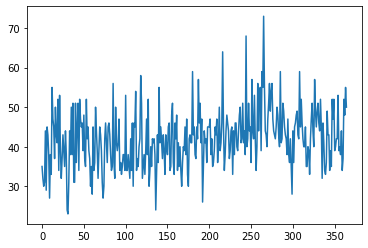

In [38]:
vz['births'].plot() #x-axis: index, y-axis: births
plt.show()

In [39]:
vz.index = vz['date']

In [40]:
vz.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


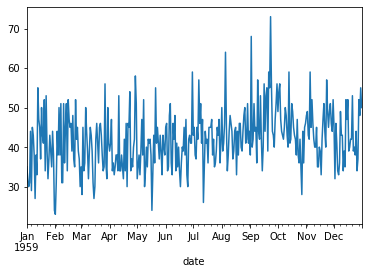

In [41]:
vz['births'].plot()
plt.show()

## Zooming In

In [42]:
vz2 = vz[(vz['date'] > '1959-01-01') & (vz['date'] <= '1959-01-10')].copy()

In [43]:
vz2.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


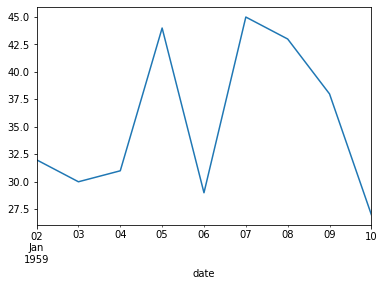

In [44]:
vz2['births'].plot()
plt.show()

## Trendline

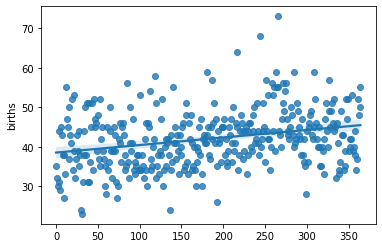

In [45]:
sns.regplot(x=df.index.values, y=df['births'])
plt.show()

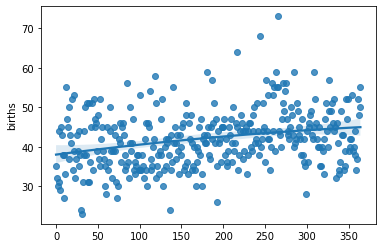

In [46]:
sns.regplot(x=df.index.values, y=df['births'], order=2)
plt.show()

In [47]:
miles_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [48]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


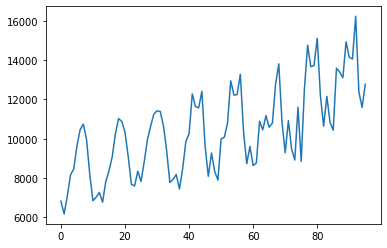

In [49]:
miles_df['MilesMM'].plot()
plt.show()

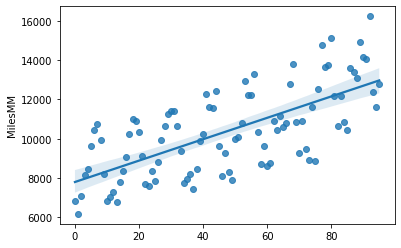

In [50]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])
plt.show()

## Removing Seasonality

In [51]:
miles_df['year'] = miles_df['Month'].dt.year

In [52]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [53]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

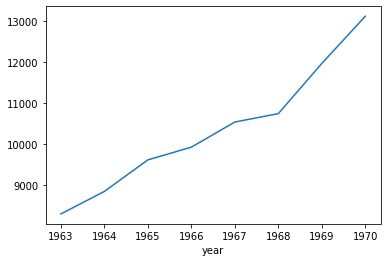

In [54]:
miles_df.groupby('year')['MilesMM'].mean().plot()
plt.show()

## Creating Lag Plots

In [55]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [56]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


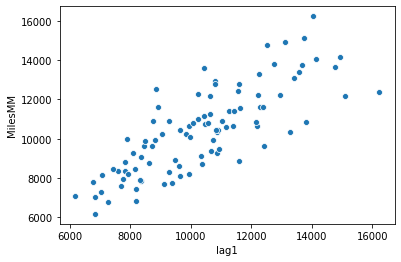

In [57]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])
plt.show()

In [58]:
from pandas.plotting import lag_plot

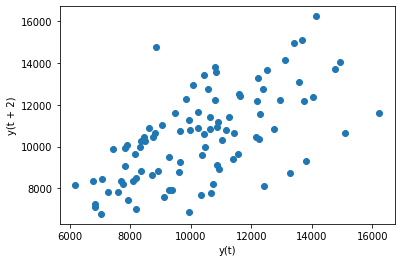

In [59]:
lag_plot(miles_df['MilesMM'], lag=2)
plt.show()

## Autocorrelation Plots

In [60]:
from pandas.plotting import autocorrelation_plot

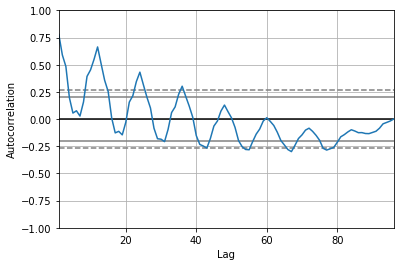

In [61]:
autocorrelation_plot(miles_df['MilesMM'])
plt.show()

- This graph tells us about the correlation between the value and the lagged value. 
- We have a very high correlation for initial 2-4 values (> 0.5).
- For the firest three periods, the lag values are highly correlated with the MilesMM value.
- We have a depth every 6 months, this is because of seasonality.

# Decomposing Time Series

We can create a time series data as a combination of four different parts:
- Level is the average value in the series.
- Trend is the increasing or decreasing value in the series.
- Seasonality is the repeating short term cycle in the series.
- Noise is the random variation in the series.

There are two ways to combine these four parts to create a time series data:

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

Now we want to learn how to decompose our time series data in these four different parts.

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
miles_decomp_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [66]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [67]:
miles_decomp_df.index = miles_decomp_df['Month']

In [69]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [70]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

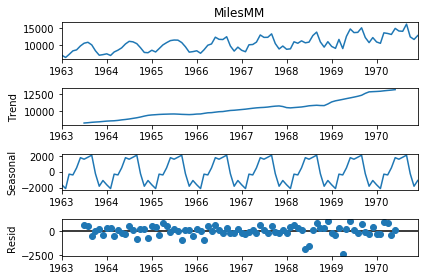

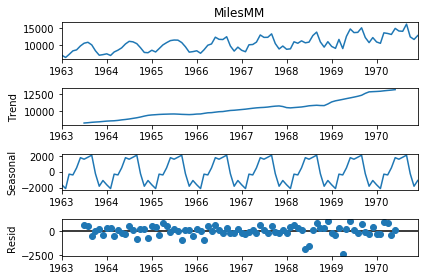

In [71]:
result.plot()

In [72]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

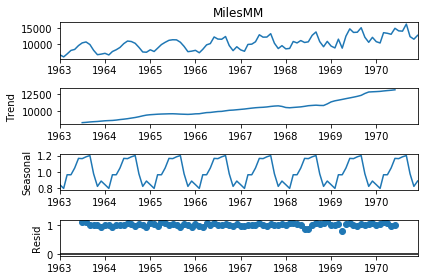

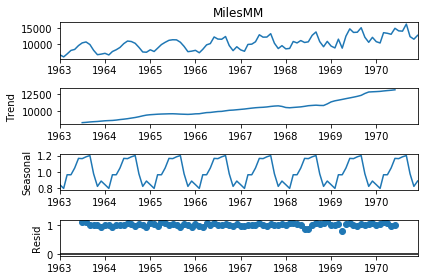

In [73]:
result2.plot()

# Differencing

In [74]:
miles_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [75]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


## Detrending

To remove trend, we apply differencing for period equal to one.

In [76]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [77]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [79]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [81]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


This new difference series should not contain any trend.

In [83]:
miles_df.index = miles_df['Month']

In [84]:
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')

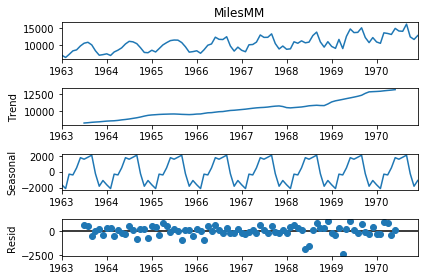

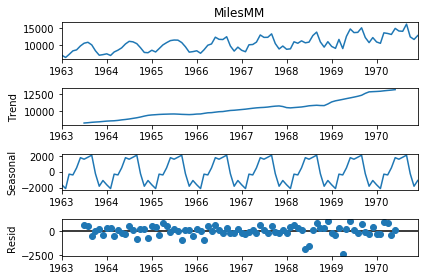

In [85]:
result_a.plot()

In [88]:
result_b = seasonal_decompose(miles_df.iloc[1:, 3], model='additive')

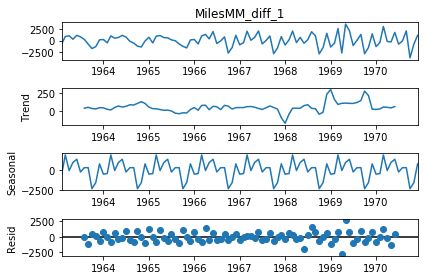

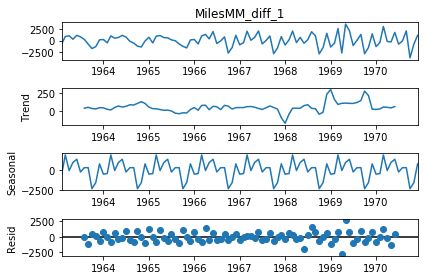

In [89]:
result_b.plot()

## Deseasoning

We apply differencing on the detrended data.

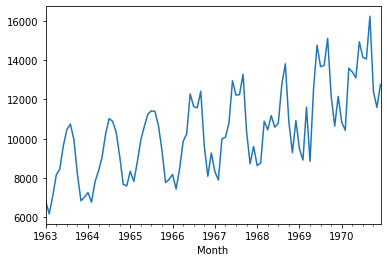

In [90]:
miles_df['MilesMM'].plot()
plt.show()

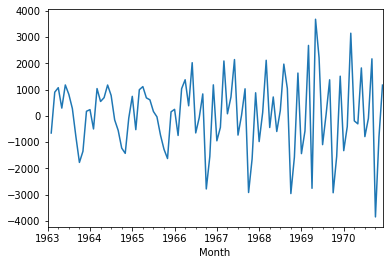

In [91]:
miles_df['MilesMM_diff_1'].plot()
plt.show()

In [94]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

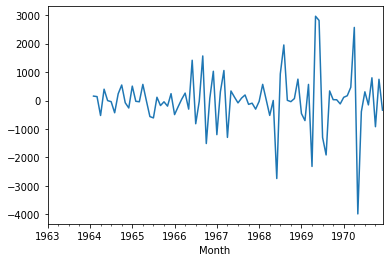

In [95]:
miles_df['MilesMM_diff_12'].plot()
plt.show()

In [98]:
miles_df.head(15)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


In [99]:
result_c = seasonal_decompose(miles_df.iloc[13:, 4], model='additive')

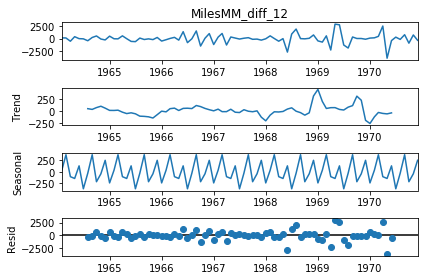

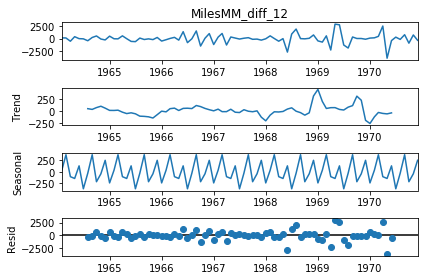

In [100]:
result_c.plot()

# Train-Test Split

In [109]:
temp_df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [110]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [111]:
temp_df.shape

(3650, 2)

In [112]:
temp_df.shape[0]

3650

In [113]:
train_size = int(temp_df.shape[0] * 0.8)
train_size

2920

In [114]:
train = temp_df[:train_size]

In [115]:
test = temp_df[train_size:]

In [116]:
train.shape, test.shape

((2920, 2), (730, 2))

## Walk Forward Validation

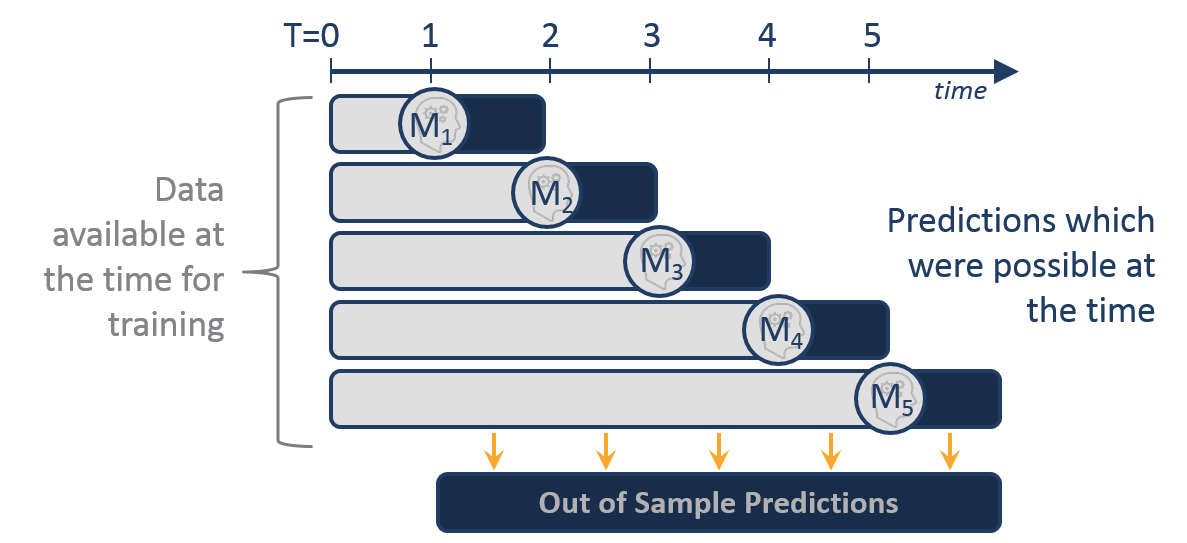